# Fall mini cut analysis

#### This cutting period is from 30/10/2024 to 1/12/2024. The goal was to lose as much bodyfat as possible to prepare for the next bulking phase.

##### I tracked my workouts to see how my lifts were affected by the cut.

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_path = "./data/fall_mini_cut.csv"

df = pd.read_csv(data_path)

## Lets start by creating few dataframes for few different exercises

In [122]:
leg_ext_df = df[df["exercise_name"] == "Leg Extension"]
v_tricep_ext_df = df[df["exercise_name"] == "V-Triceps Extension"]
leg_curl_df = df[df["exercise_name"] == "Seated hamstring curl"]
bayesian_df = df[df["exercise_name"] == "Bayesian curl"]

exercise_dfs = [
    (leg_ext_df, "Leg Extension"),
    (v_tricep_ext_df, "V-Triceps Extension"),
    (leg_curl_df, "Seated Hamstring Curl"),
    (bayesian_df, "Bayesian curl"),
]

# Visualization of the data

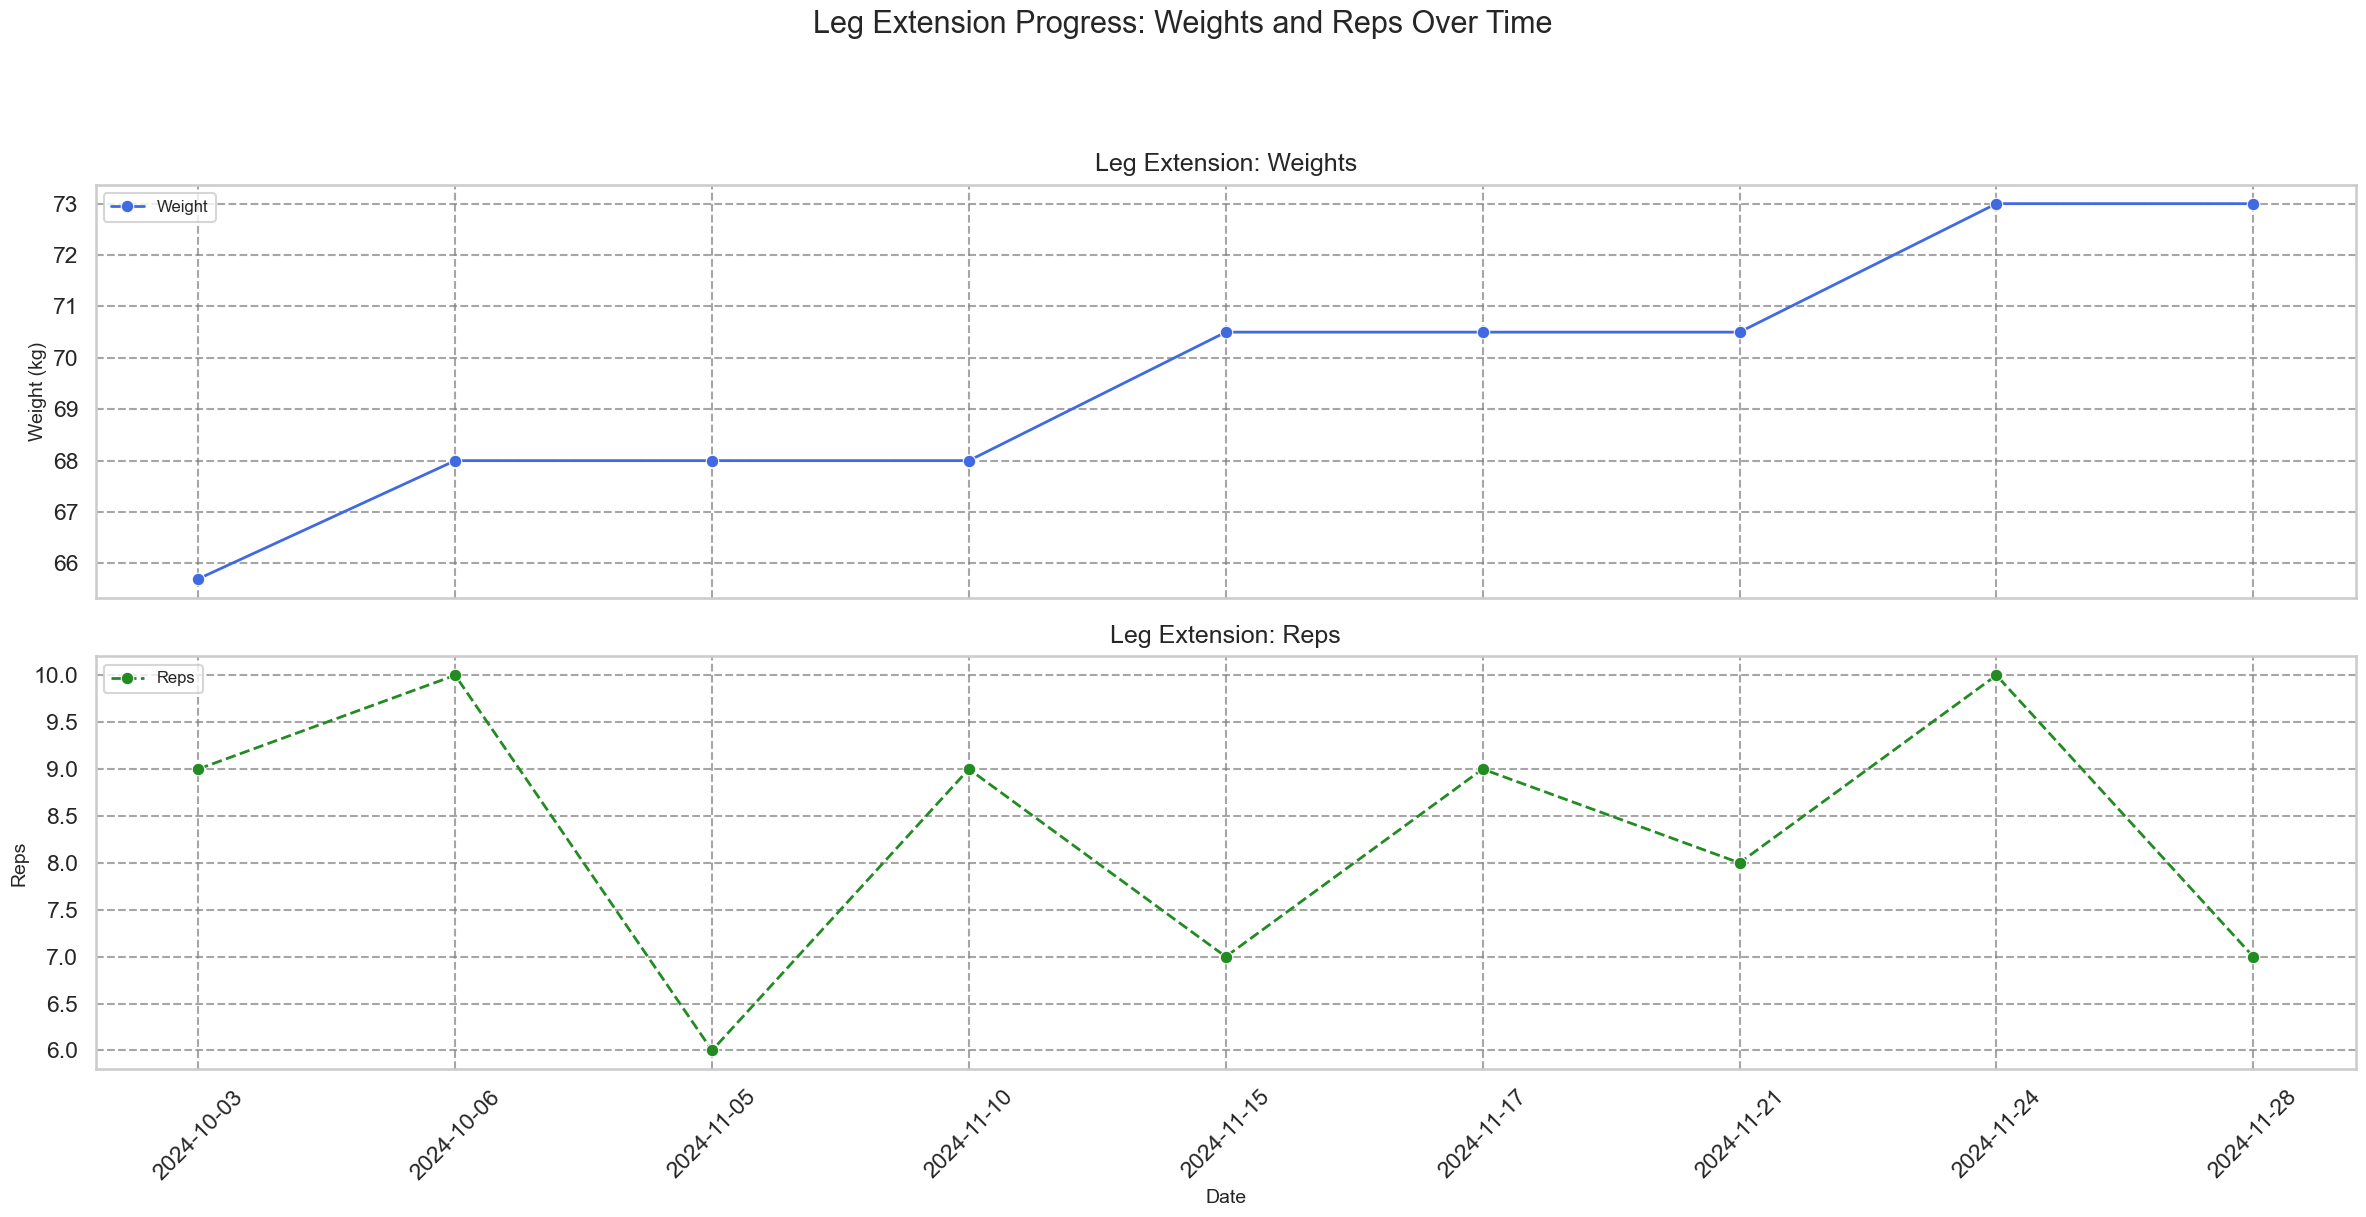

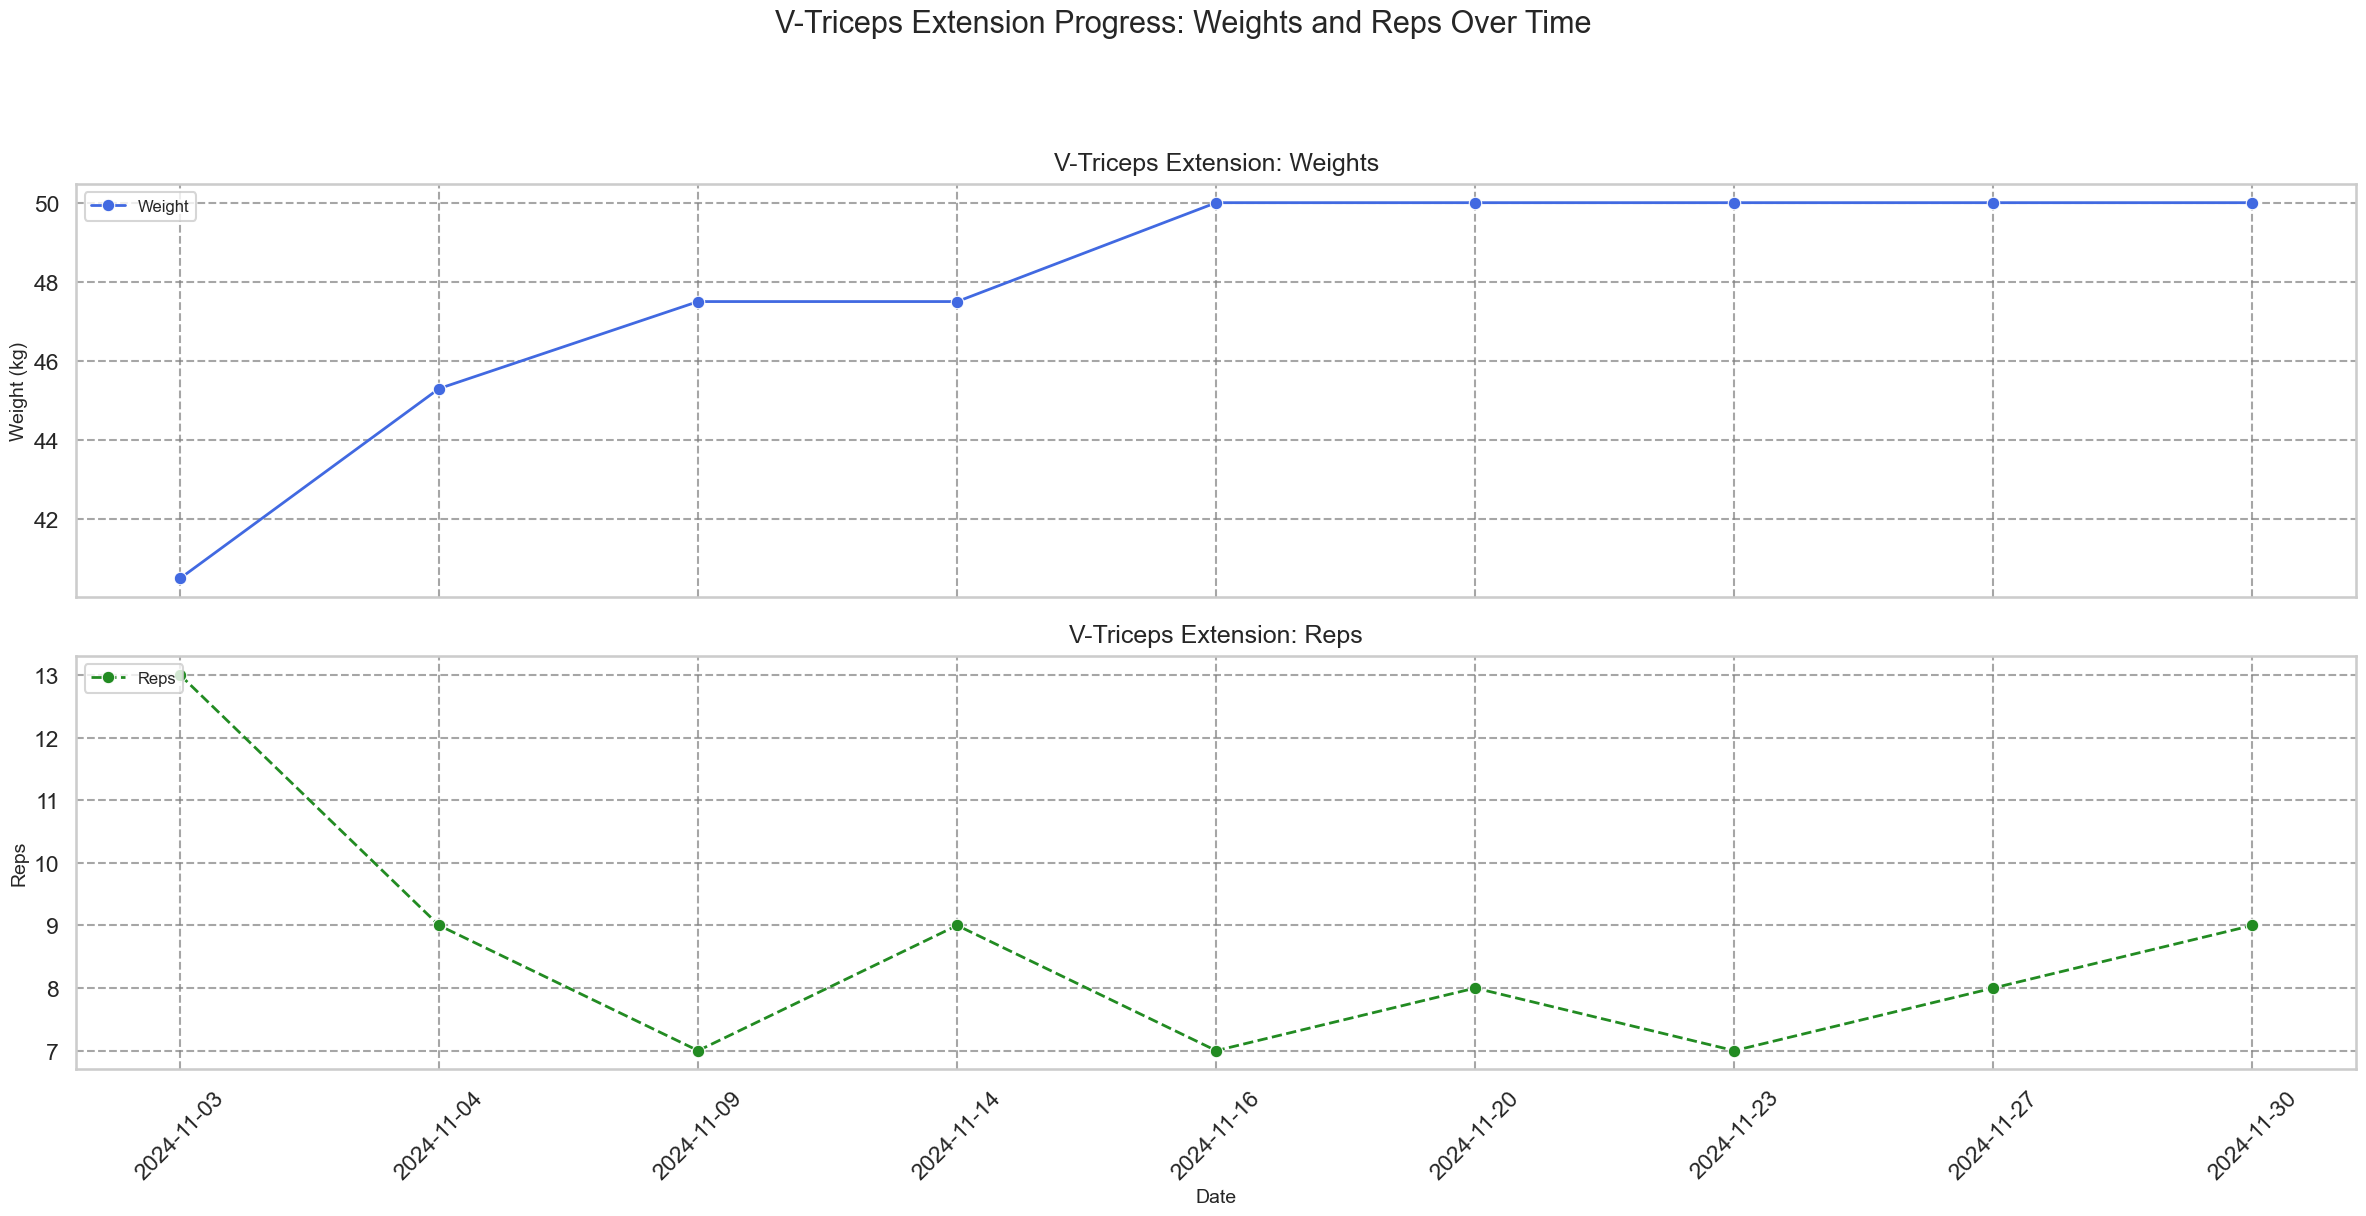

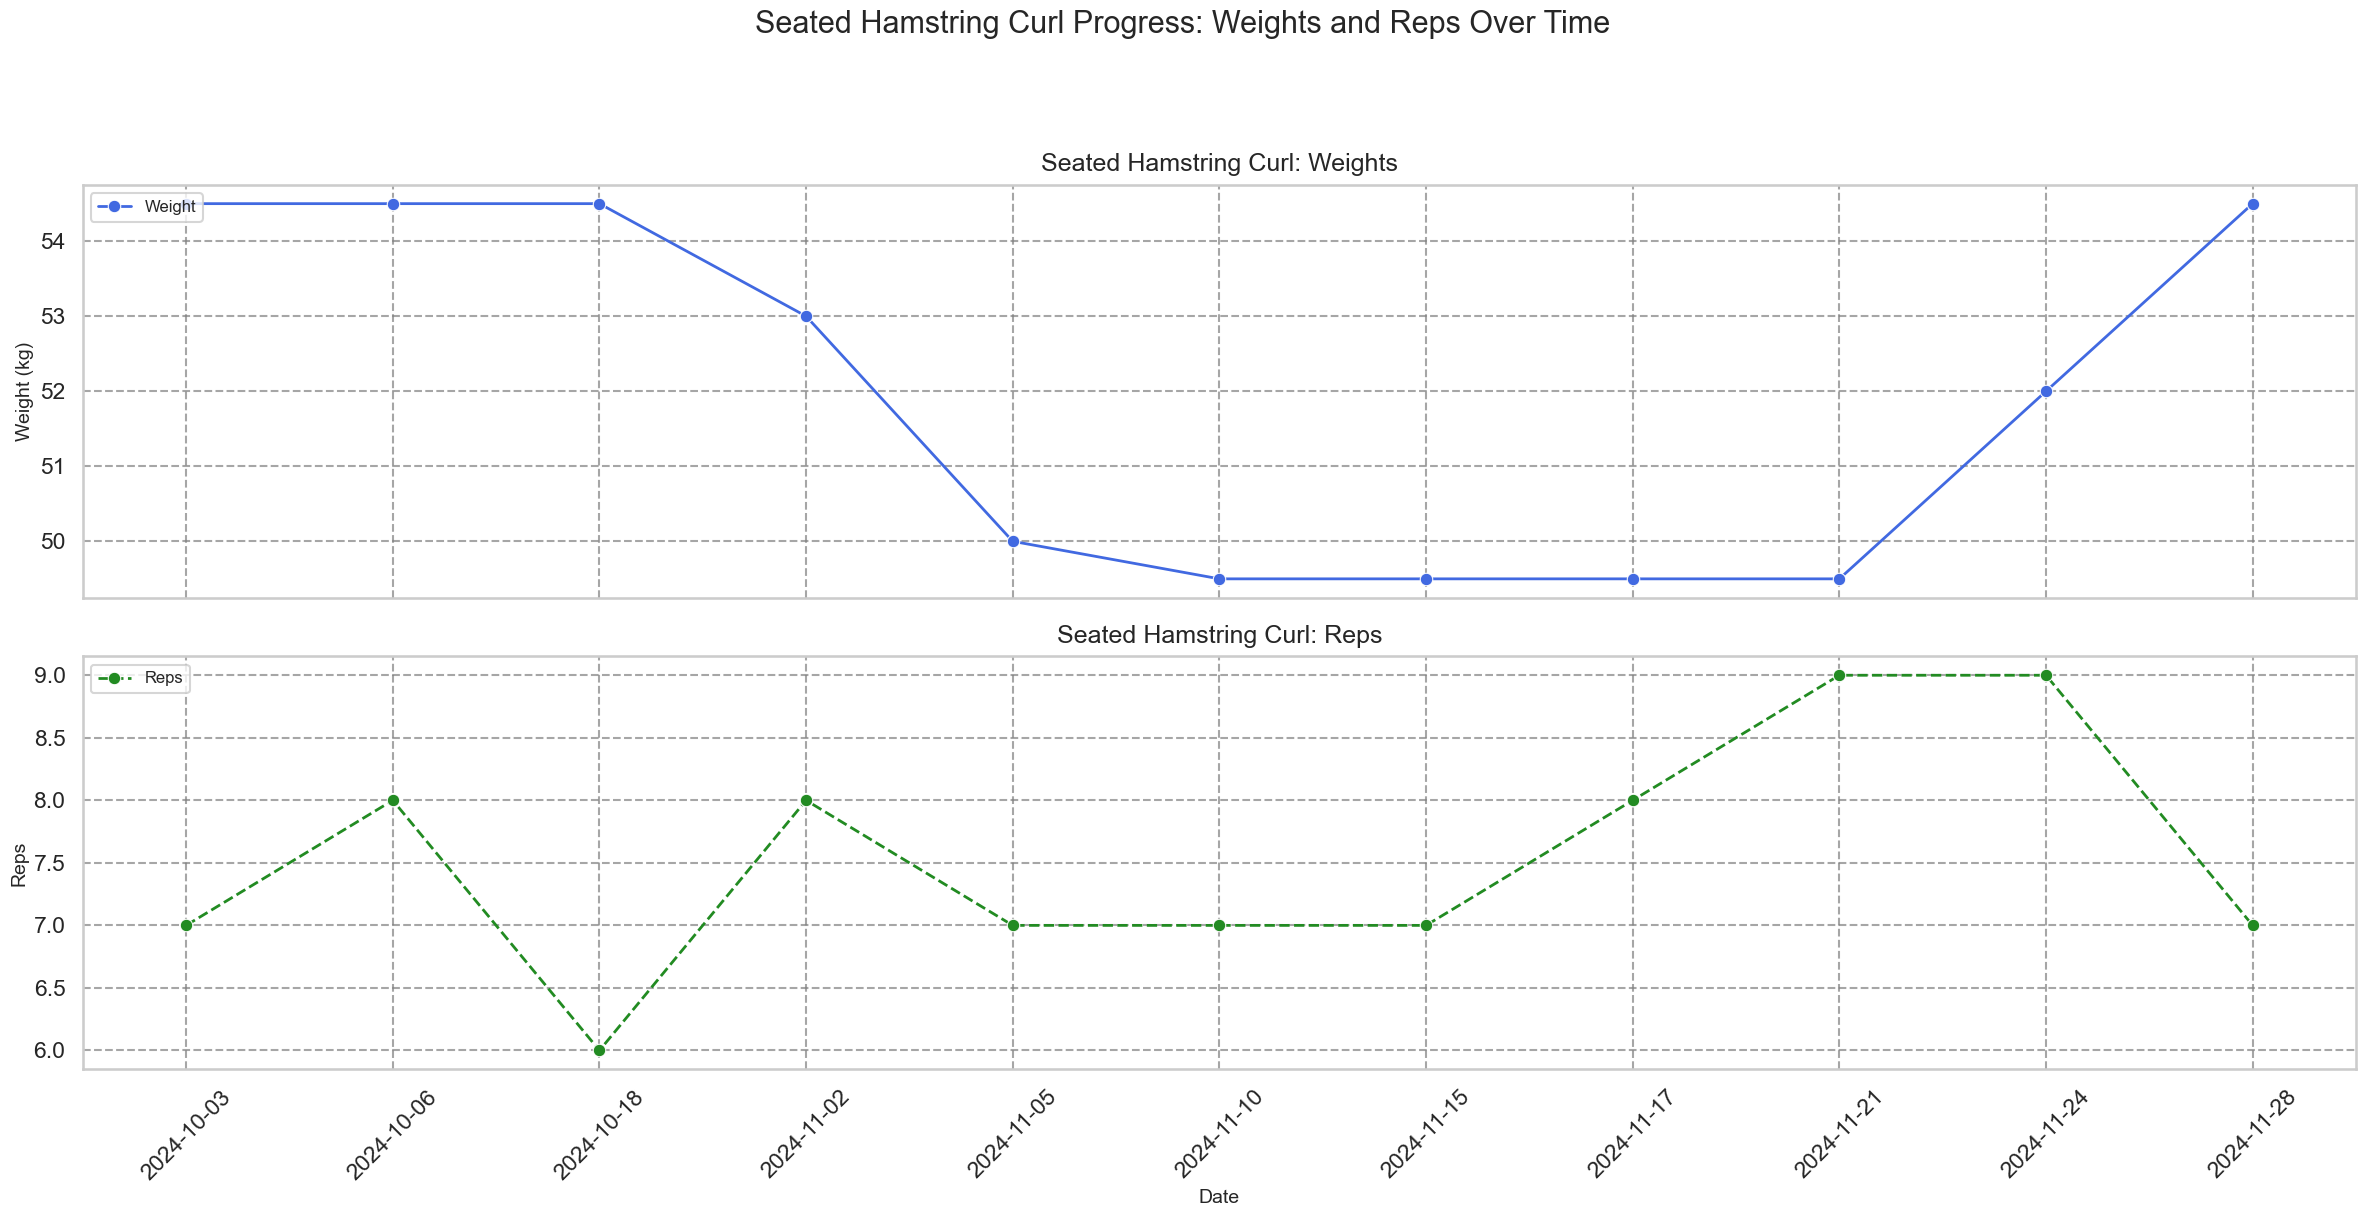

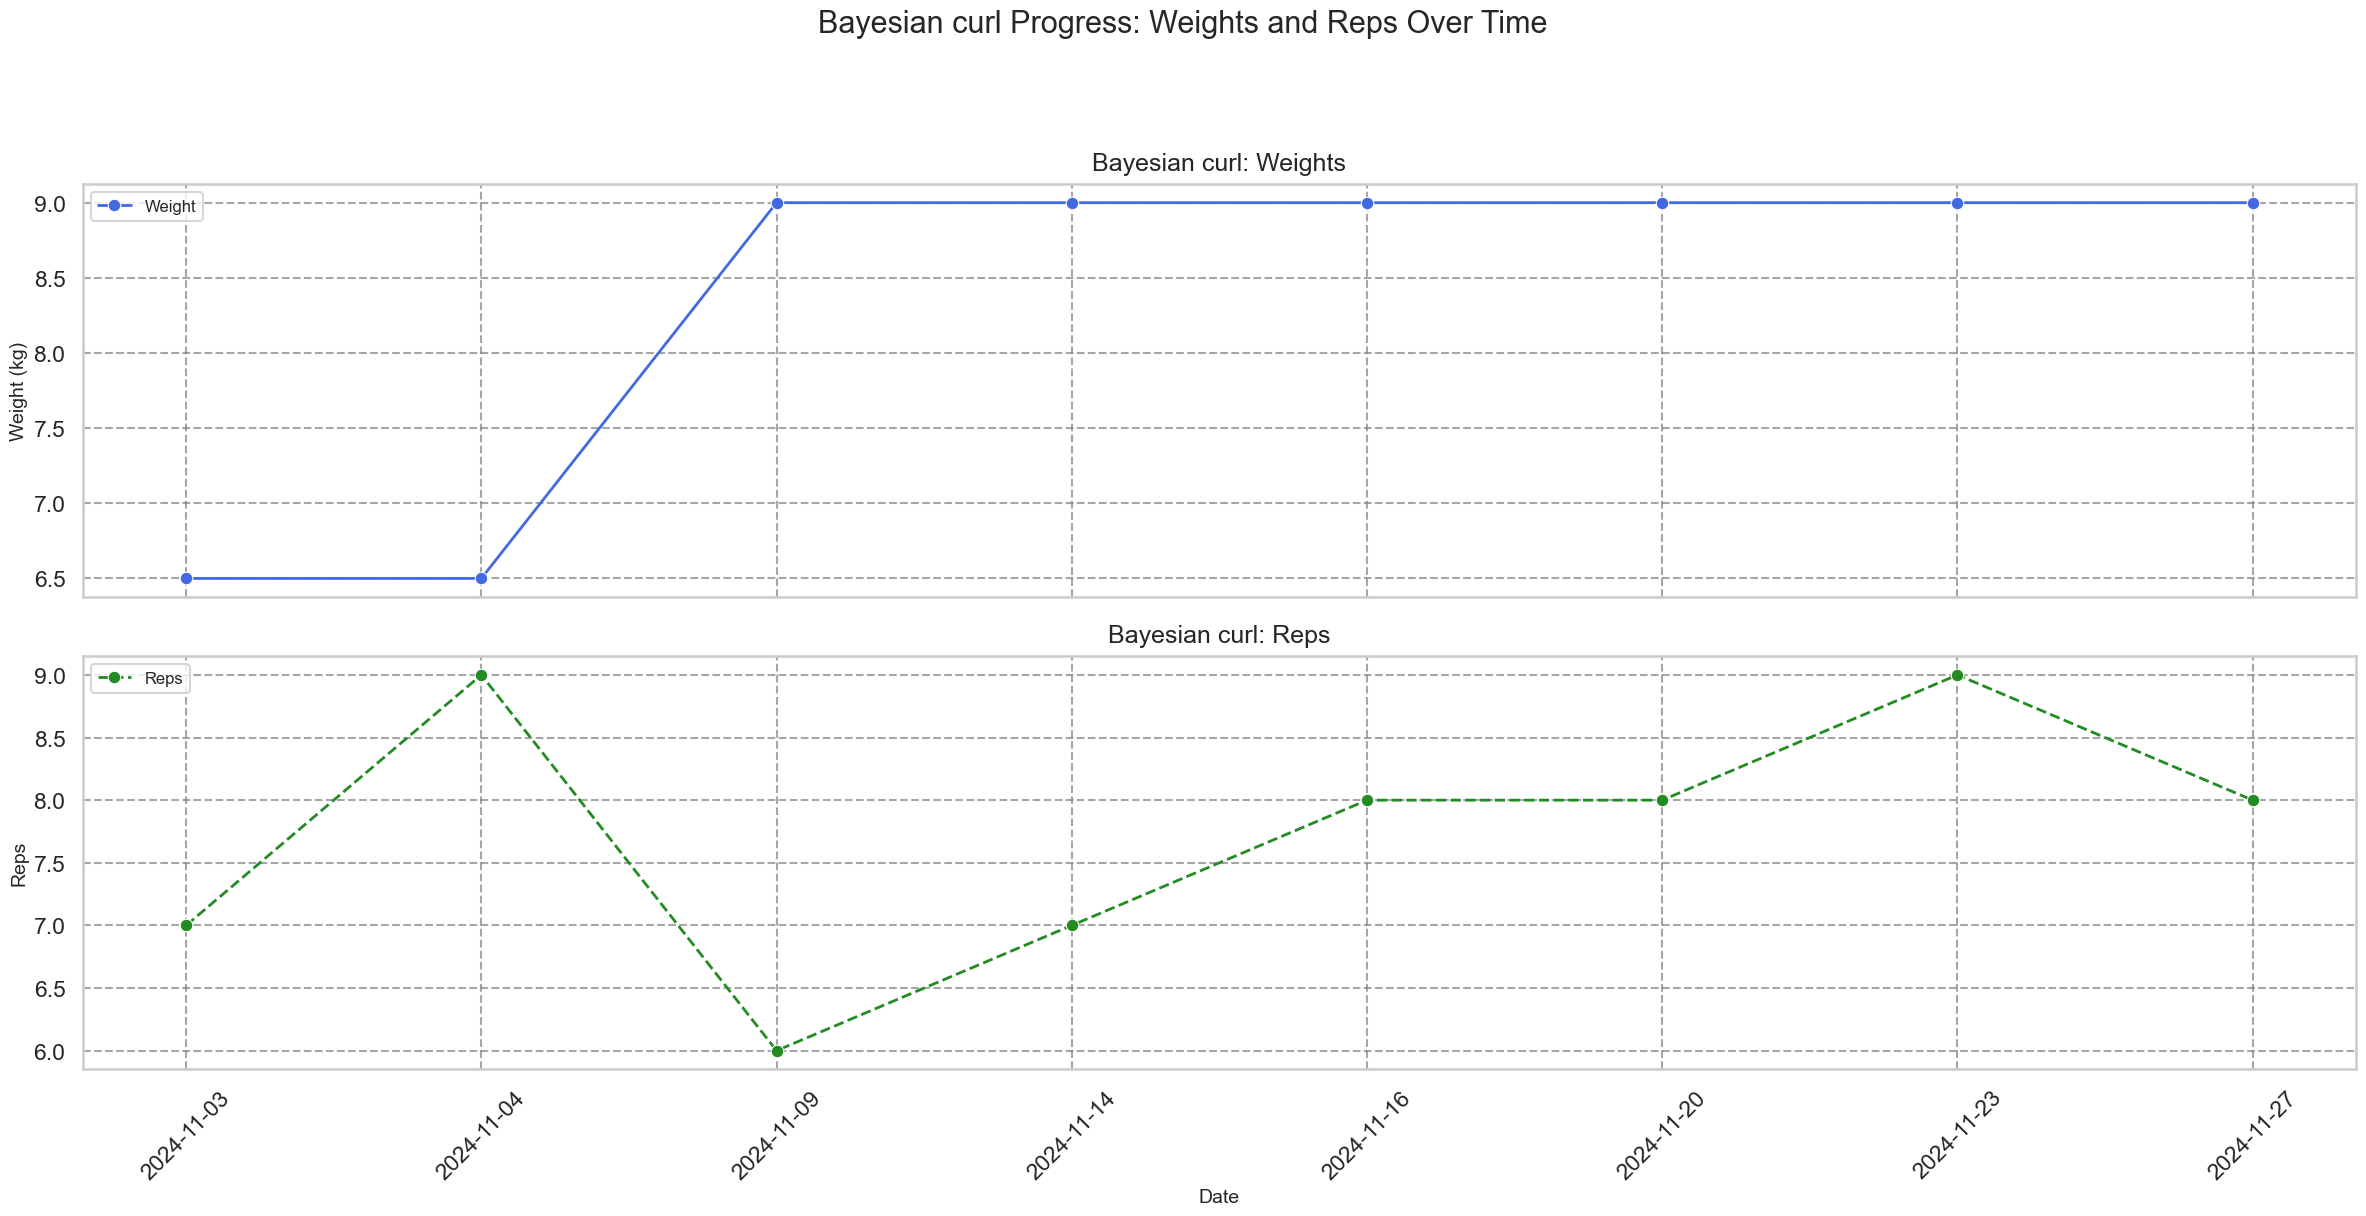

In [123]:
sns.set_theme(style="whitegrid", context="talk")

for exercise_df, exercise_name in exercise_dfs:
    fig, axes = plt.subplots(2, 1, figsize=(24, 12), sharex=True)
    
    sns.lineplot(
        ax=axes[0],
        data=exercise_df,
        x="date",
        y="weight",
        marker="o",
        linestyle="-",
        color="royalblue",
        linewidth=2,
        label="Weight",
    )
    axes[0].set_title(f"{exercise_name}: Weights", fontsize=18, pad=10)
    axes[0].set_ylabel("Weight (kg)", fontsize=14)
    axes[0].legend(loc="upper left", fontsize=12)
    axes[0].grid(visible=True, which="major", color="gray", linestyle="--", alpha=0.7)


    sns.lineplot(
        ax=axes[1],
        data=exercise_df,
        x="date",
        y="reps",
        marker="o",
        linestyle="--",
        color="forestgreen",
        linewidth=2,
        label="Reps",
    )
    axes[1].set_title(f"{exercise_name}: Reps", fontsize=18, pad=10)
    axes[1].set_xlabel("Date", fontsize=14)
    axes[1].set_ylabel("Reps", fontsize=14)
    axes[1].legend(loc="upper left", fontsize=12)
    axes[1].grid(visible=True, which="major", color="gray", linestyle="--", alpha=0.7)

    axes[1].tick_params(axis="x", rotation=45)

    fig.suptitle(f"{exercise_name} Progress: Weights and Reps Over Time", fontsize=22, y=1.02)

    plt.tight_layout(rect=[0, 0, 1, 0.97])

    plt.show()

#### As we can see from the data, i did not lose much strength during the cut. I was able to maintain my strength for most of the exercises. I was able to increase my strength for few exercises as well. I noticed that on seated leg curls i was using too much momentum so i decreased the weight and focused on the full range of motion. I was able to get back to same weight after focusing on the ROM.

# Frequency on a weekly basis

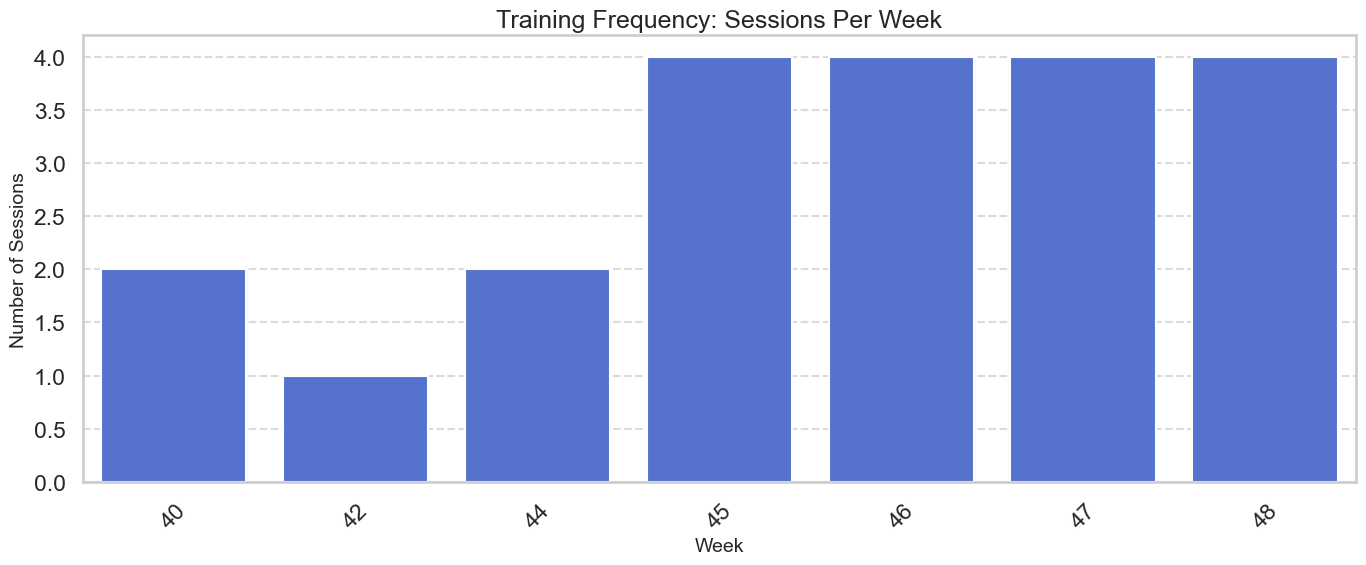

In [ ]:
df["date"] = pd.to_datetime(df["date"])

df["week"] = df["date"].dt.isocalendar().week

sessions_per_week = df.groupby("week")["date"].nunique().reset_index()
sessions_per_week.rename(columns={"date": "sessions_per_week"}, inplace=True)

sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(14, 6))
sns.barplot(data=sessions_per_week, x="week", y="sessions_per_week", color="royalblue")
plt.title("Training Frequency: Sessions Per Week", fontsize=18)
plt.xlabel("Week", fontsize=14)
plt.ylabel("Number of Sessions", fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


### My goal was to train 4 times a week. I am doing upper - lower split. The gym i got to was closed because they were moving so that affected my training frequency. That is why week 41 and 42 are missing data.